In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

In [10]:
train_df = pd.read_csv('/content/train.csv')
test_df= pd.read_csv('/content/test.csv')

In [6]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
submission_df.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [15]:
# Reorder columns in both datasets
train_df_reordered = train_df.loc[:, ['PassengerId','Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
test_df_reordered = test_df.loc[:, ['PassengerId','Pclass', 'Sex', 'Age', 'Fare']]

test_df_reordered.head(5)

,PassengerId,Pclass,Sex,Age,Fare
0,892,3,male,34.5,7.8292
1,893,3,female,47.0,7.0000
2,894,2,male,62.0,9.6875
3,895,3,male,27.0,8.6625
4,896,3,female,22.0,12.2875


In [17]:
# how much null in each column
train_df_reordered.isnull().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,177
Fare,0
Survived,0


In [16]:
# how much null in each column
test_df_reordered.isnull().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,86
Fare,1


In [24]:
# Handle missing values in the 'Age' column
train_df_reordered['Age'] = train_df_reordered['Age'].fillna(train_df['Age'].mean())
test_df_reordered['Age'] = test_df_reordered['Age'].fillna(test_df['Age'].mean())
test_df_reordered['Fare'] = test_df_reordered['Fare'].fillna(test_df['Fare'].mean())


In [25]:
# Convert 'Sex' to numeric (male:1, female:0)
train_df_reordered['Sex'] = train_df_reordered['Sex'].map({'male': 1, 'female': 0})
test_df_reordered['Sex'] = test_df_reordered['Sex'].map({'male': 1, 'female': 0})

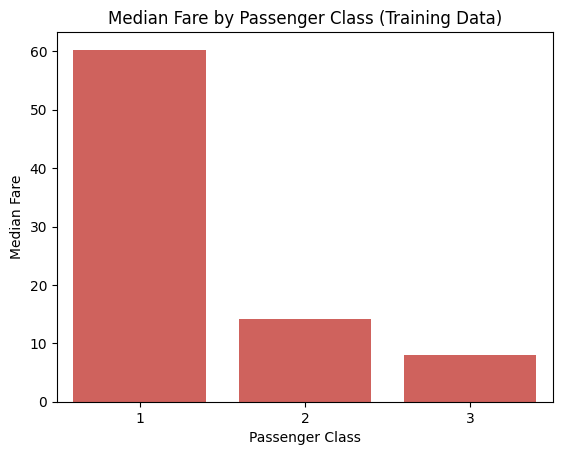

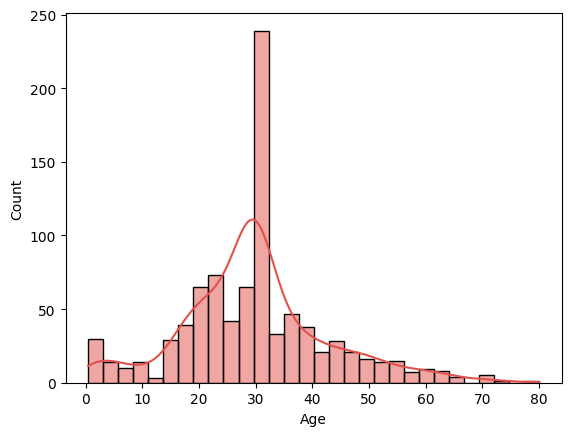

In [26]:
# Compare the median fare across different classes for training data
median_fare_train = train_df_reordered.groupby('Pclass')['Fare'].median().reset_index()
sns.barplot(x='Pclass', y='Fare', data=median_fare_train)
plt.title('Median Fare by Passenger Class (Training Data)')
plt.xlabel('Passenger Class')
plt.ylabel('Median Fare')
plt.show()


sns.set_palette("Spectral")

# Histogram of Ages
sns.histplot(data=train_df_reordered, x="Age", kde=True)
plt.show()

In [39]:

from sklearn.model_selection import KFold, cross_val_score


In [44]:

X = train_df_reordered.drop('Survived', axis=1)
y = train_df_reordered['Survived']

model = GaussianNB()

model.fit(X, y)

X_test = test_df_reordered

predictions = model.predict(X_test)

submission_df = pd.read_csv('/content/gender_submission.csv')

# Update the 'Survived' column with predictions
submission_df['Survived'] = predictions

# Save submission file
submission_df.to_csv('submission.csv', index=False)

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print(f"Cross-Validation Scores: {scores}")



Cross-Validation Scores: [0.75977654 0.7752809  0.82022472 0.7247191  0.79775281]
